# **Importing Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Logistic Regression , KNN , SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV 
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

# **Loading Data**

In [3]:
# load data
df = pd.read_csv('/content/wpbc.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [4]:
df.columns = ['id','diagnosis','recurr_time','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst' ,'texture_worst' ,  'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dim_worst','Tumor_size','Lymph node status']

In [5]:
### Information about features rows,memory usage and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      198 non-null    int64  
 1   diagnosis               198 non-null    object 
 2   recurr_time             198 non-null    int64  
 3   radius_mean             198 non-null    float64
 4   texture_mean            198 non-null    float64
 5   perimeter_mean          198 non-null    float64
 6   area_mean               198 non-null    float64
 7   smoothness_mean         198 non-null    float64
 8   compactness_mean        198 non-null    float64
 9   concavity_mean          198 non-null    float64
 10  concave_points_mean     198 non-null    float64
 11  symmetry_mean           198 non-null    float64
 12  fractal_dimension_mean  198 non-null    float64
 13  radius_se               198 non-null    float64
 14  texture_se              198 non-null    fl

In [ ]:
### Shape of the dataset having 32 columns and 569 rows
df.shape

(198, 35)

In [ ]:
### Statistical analysis of all columns containing mean , median , etc.
df.describe(include='all')

,id,diagnosis,recurr_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst,Tumor_size,Lymph node status
count,1.980000e+02,198,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
mean,1.990469e+06,NaN,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,NaN
std,2.889025e+06,NaN,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,NaN
min,8.423000e+03,NaN,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,NaN
25%,8.557452e+05,NaN,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,NaN
50%,8.863390e+05,NaN,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,NaN
75%,9.279958e+05,NaN,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,NaN


In [ ]:
# drop useless columns
df.drop(['id'], axis=1, inplace=True)
df.head(3)

,diagnosis,recurr_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst,Tumor_size,Lymph node status
0,N,31,18.02,27.60,117.5,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.7,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.1,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0


In [ ]:
df.groupby(by='diagnosis').mean()

,recurr_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst,Tumor_size
diagnosis,,,,,,,,,,,,,,,,,,,,,
N,53.470199,17.105960,22.429801,112.756424,932.827815,0.102537,0.142626,0.154087,0.084547,0.194277,...,30.310331,136.617616,1328.221854,0.143449,0.366933,0.434983,0.176908,0.326530,0.091478,2.656291
R,25.085106,18.396596,21.781915,121.603830,1089.597872,0.103147,0.142719,0.163169,0.093936,0.187860,...,29.588936,152.331915,1651.495745,0.145436,0.359219,0.442155,0.184783,0.313362,0.088740,3.461702


# **EDA**

### Univariate Analysis

In [ ]:
plt.rcParams['figure.max_open_warning'] = 35

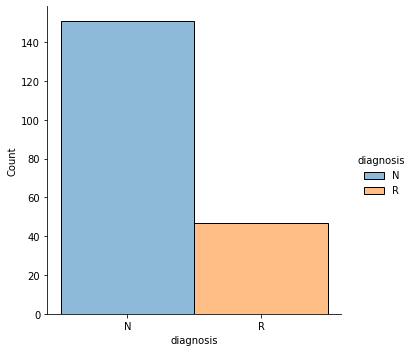

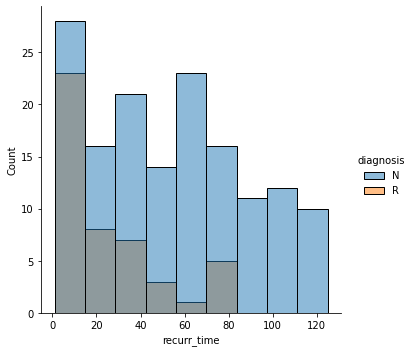

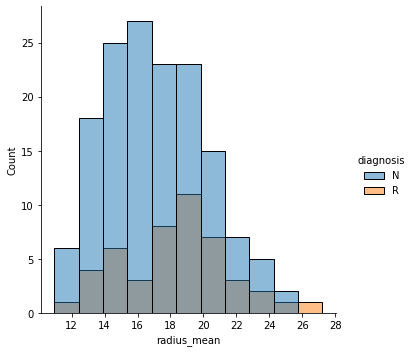

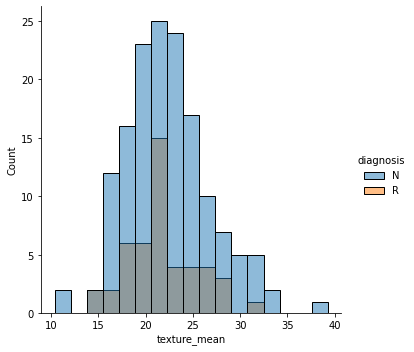

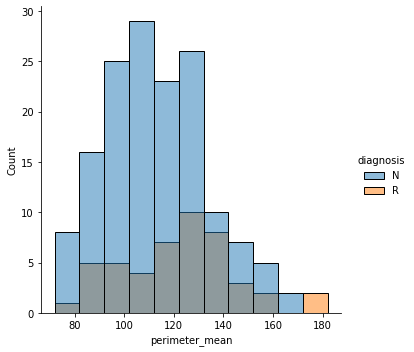

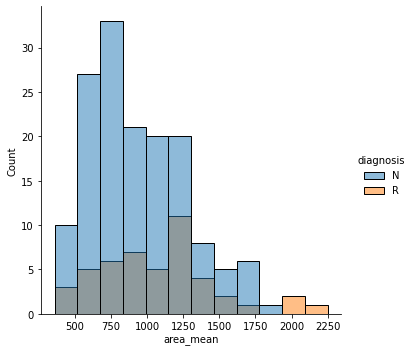

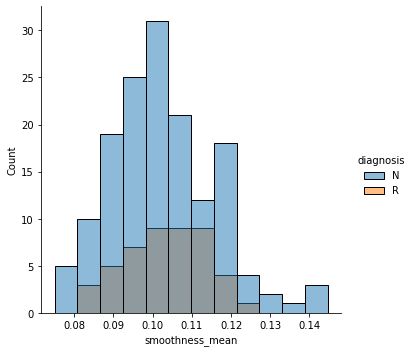

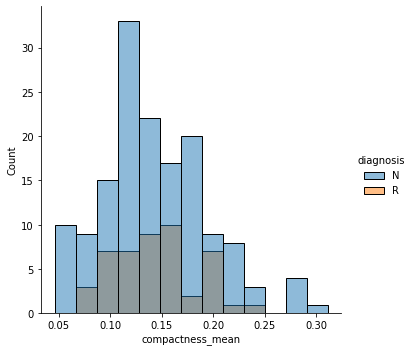

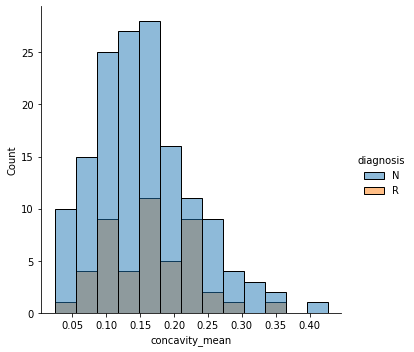

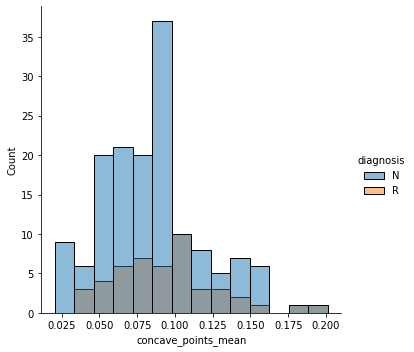

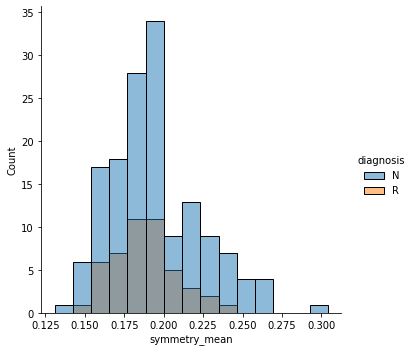

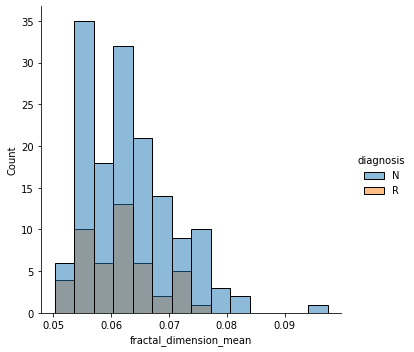

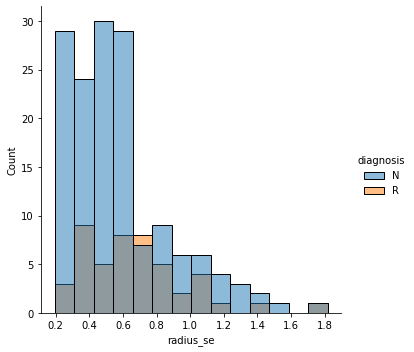

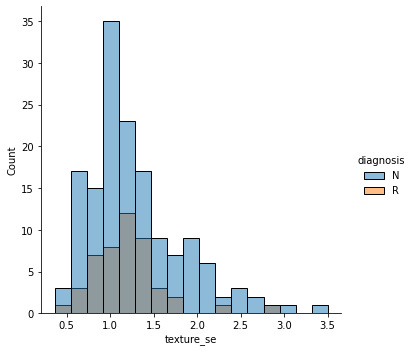

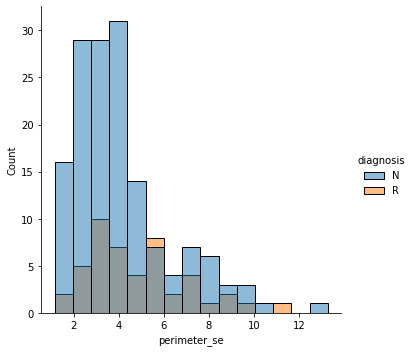

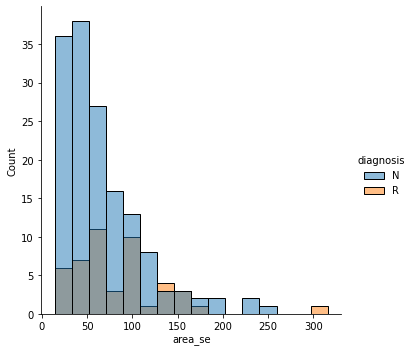

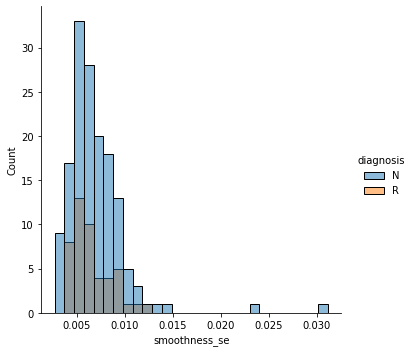

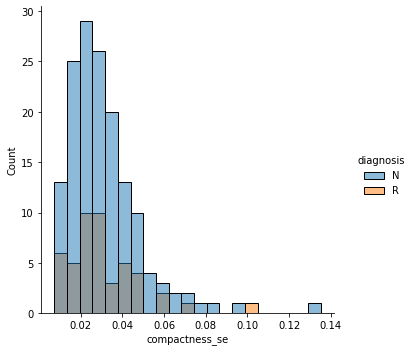

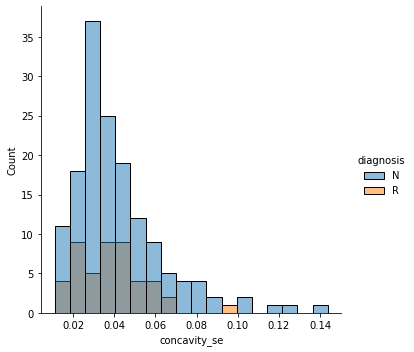

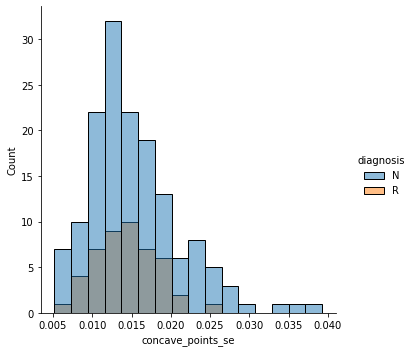

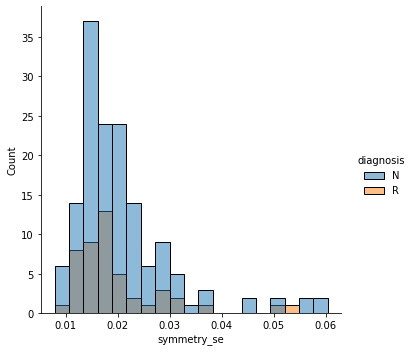

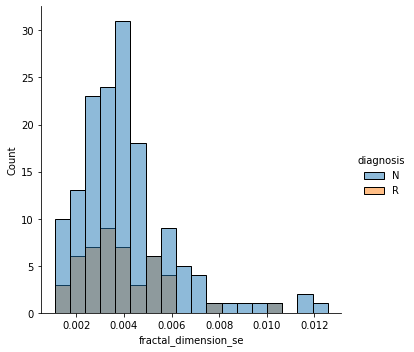

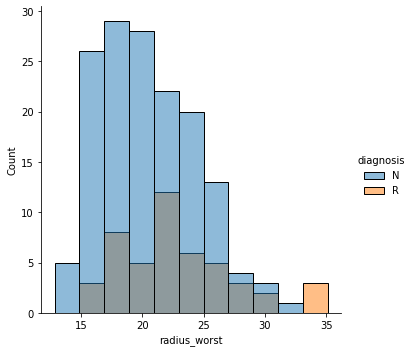

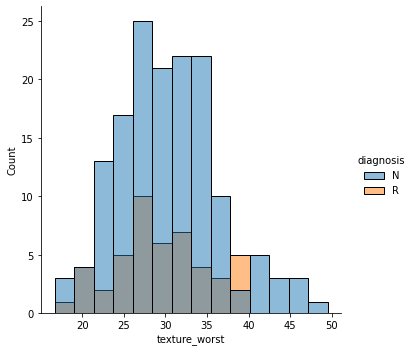

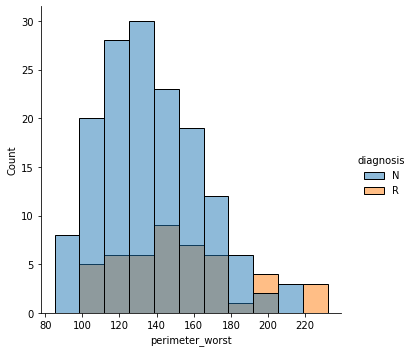

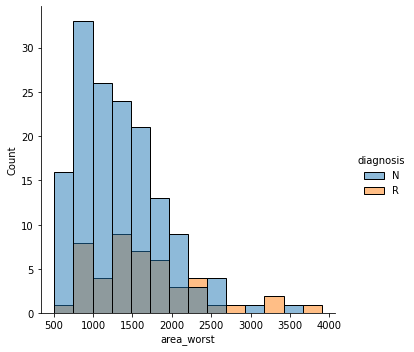

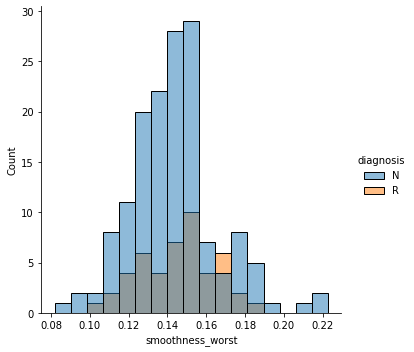

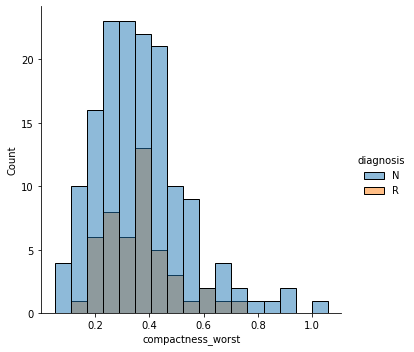

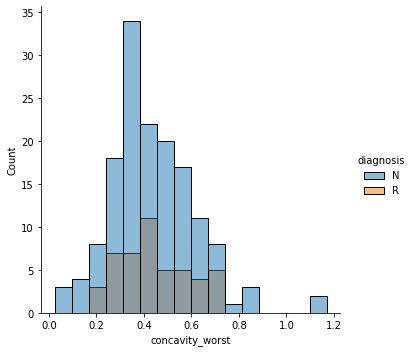

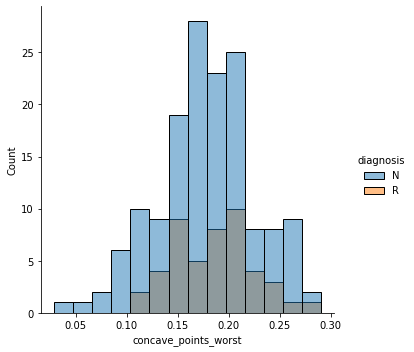

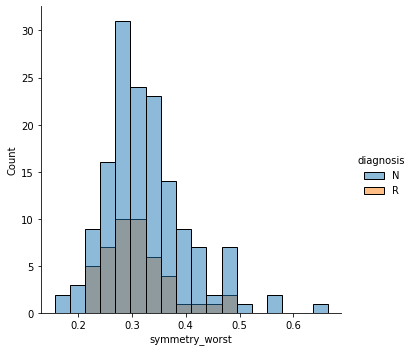

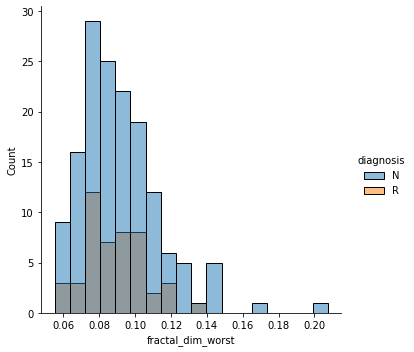

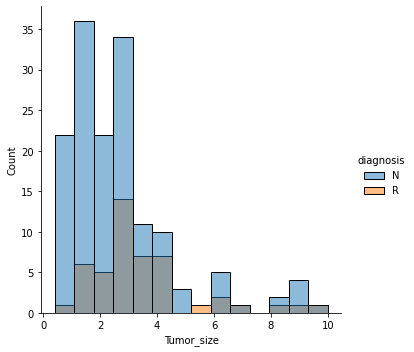

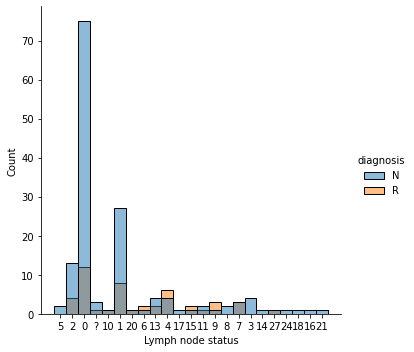

In [ ]:
for i in range(len(df.columns)):
  sns.displot(df,x=df.columns[i],hue='diagnosis')

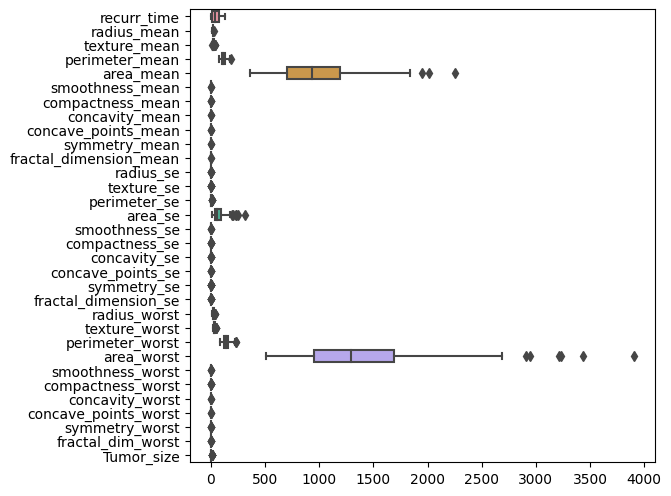

In [ ]:
### Boxplot checking outliers
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

### Bivariate Analysis

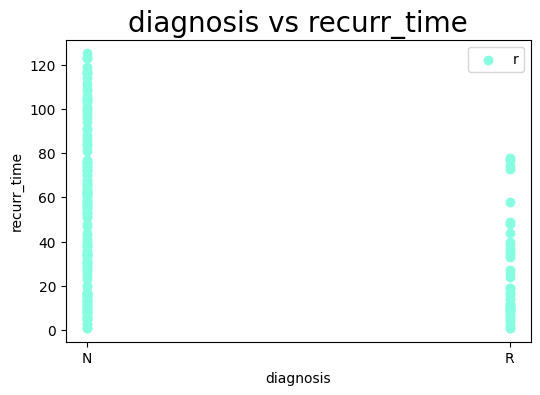

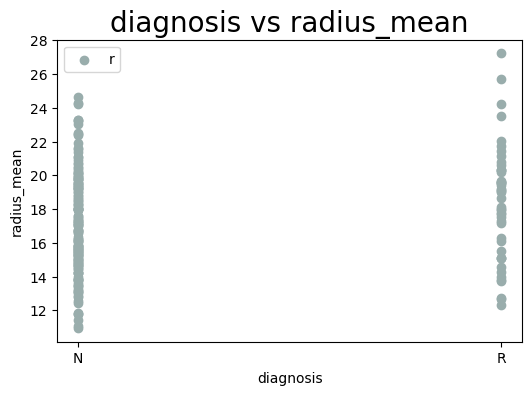

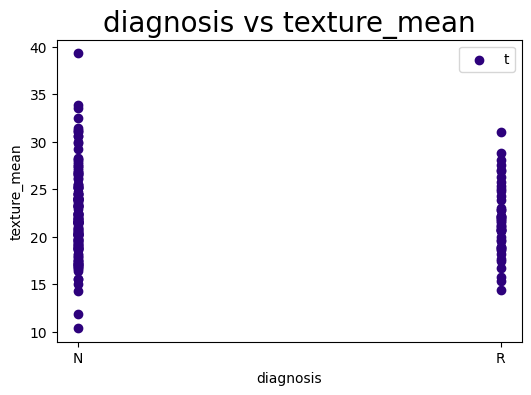

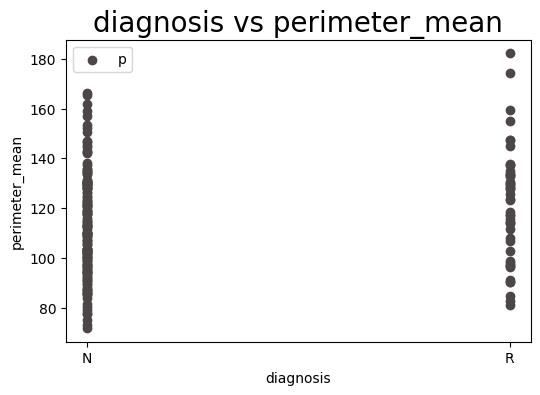

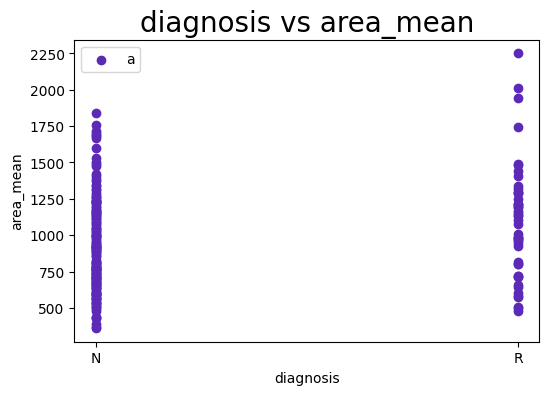

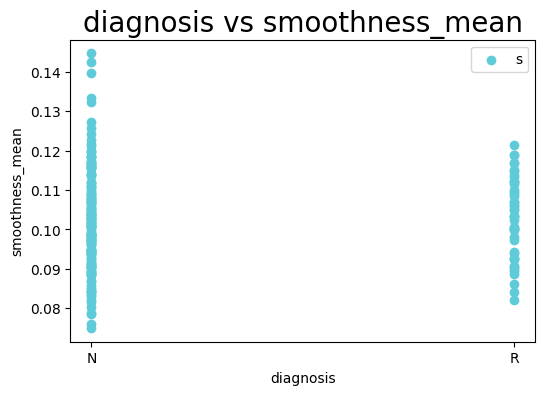

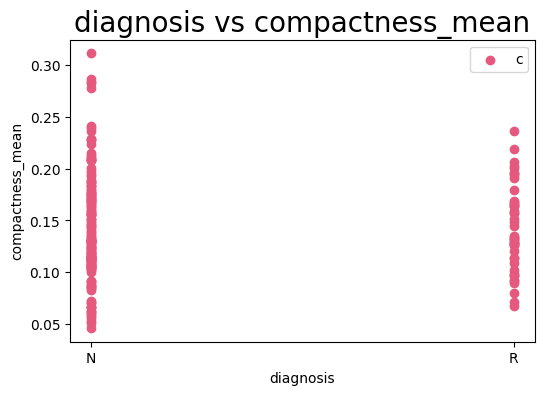

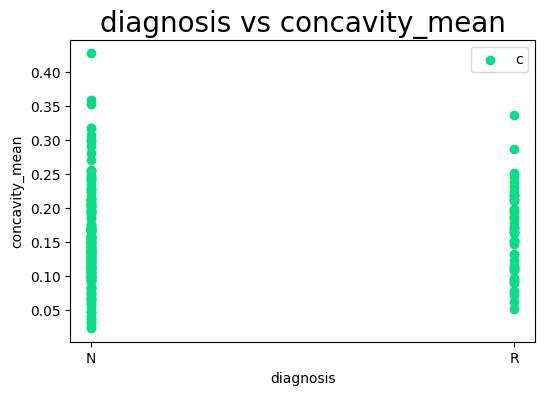

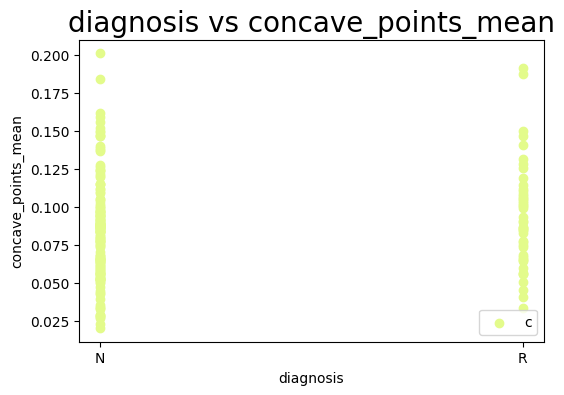

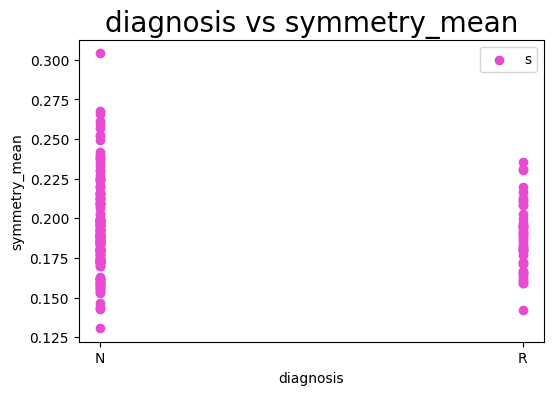

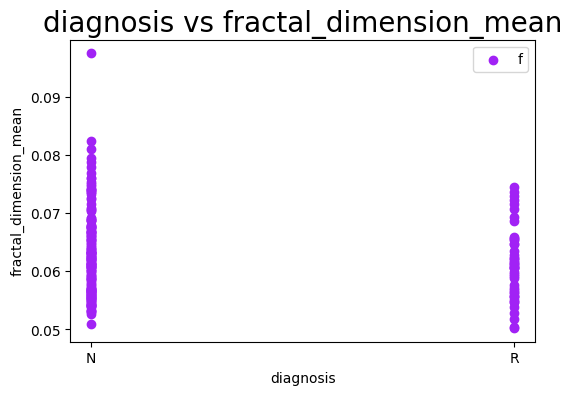

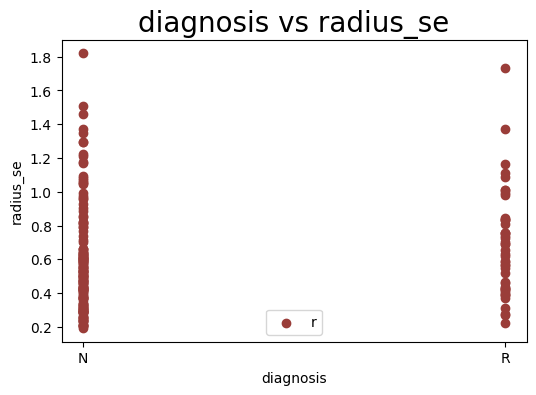

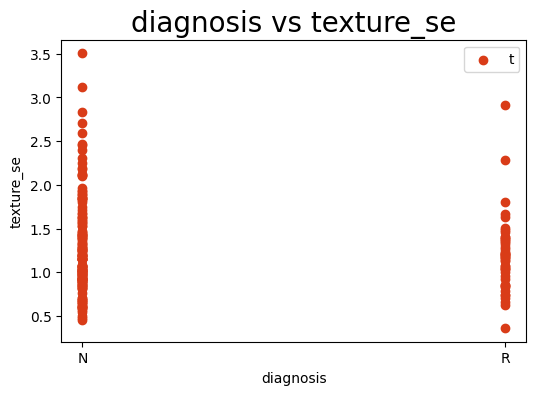

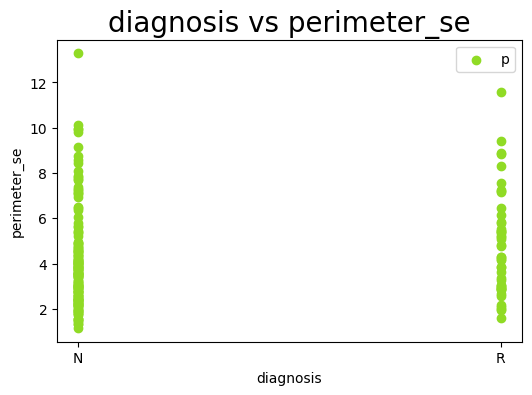

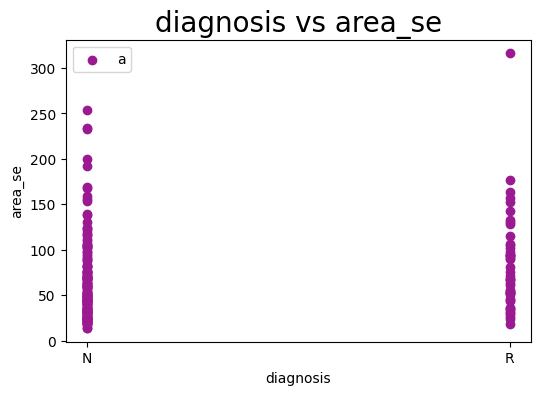

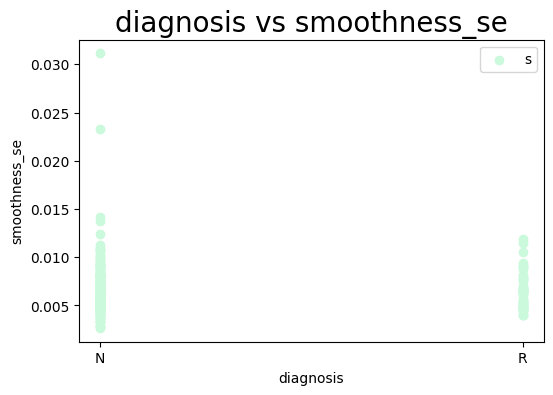

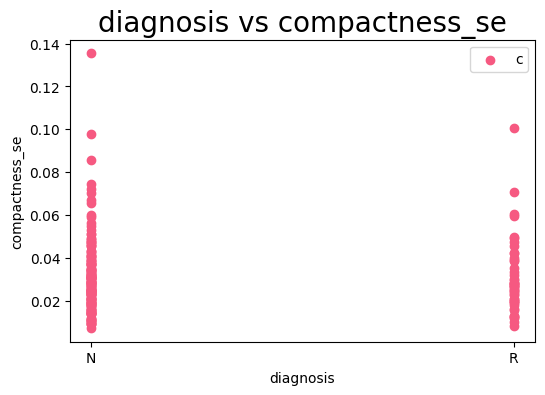

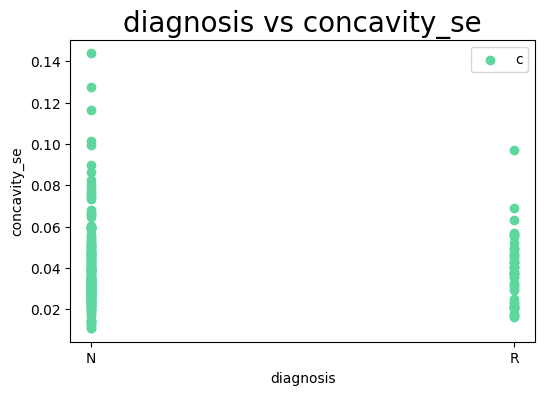

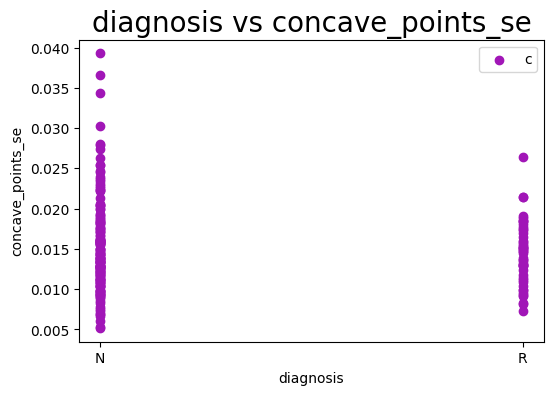

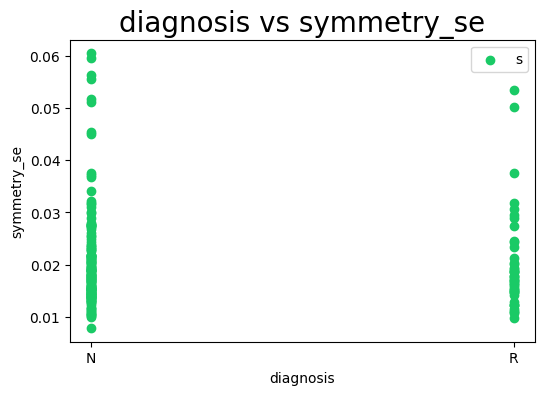

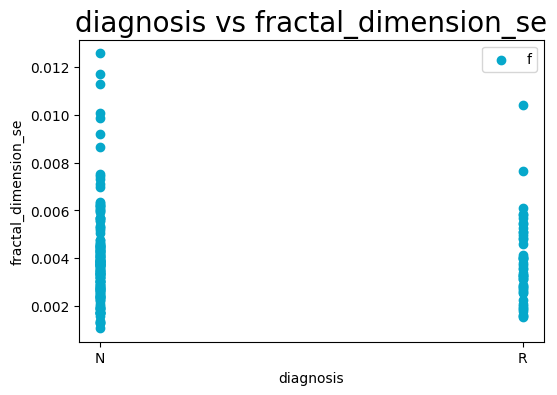

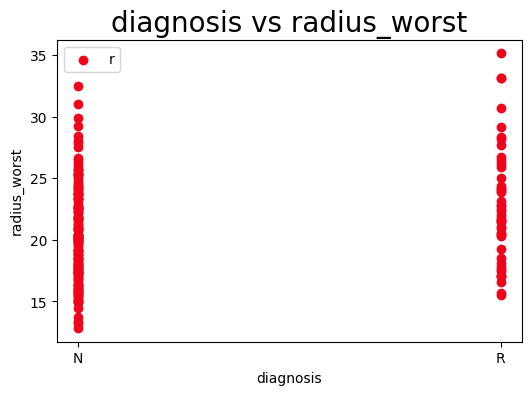

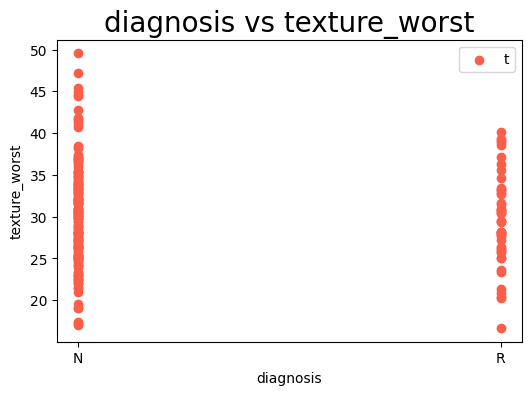

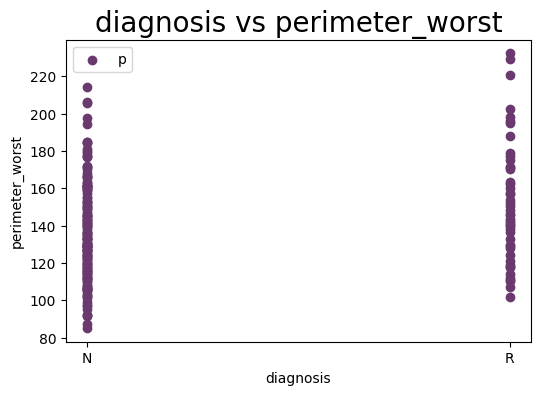

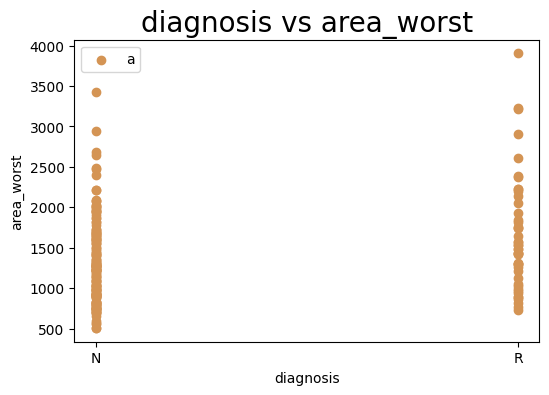

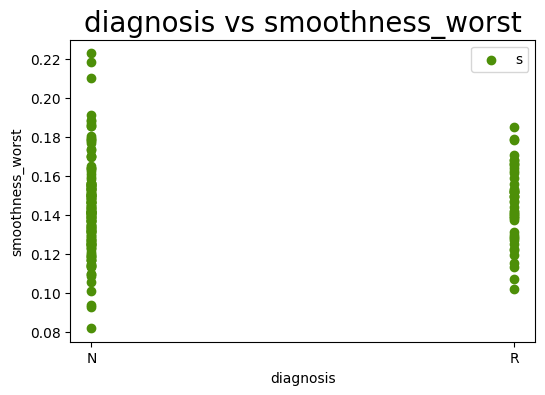

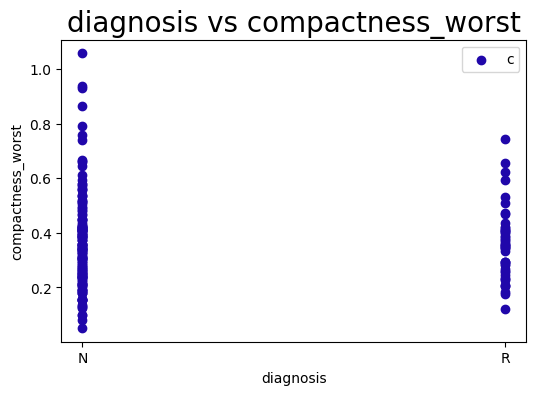

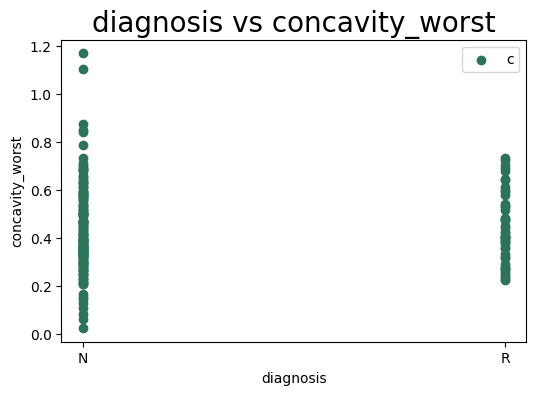

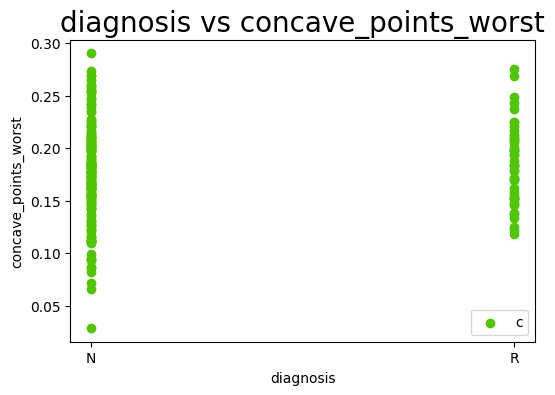

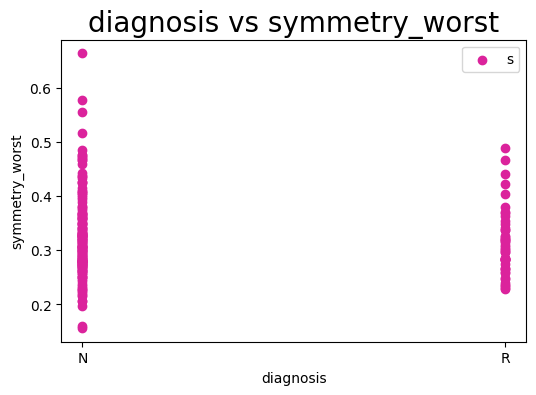

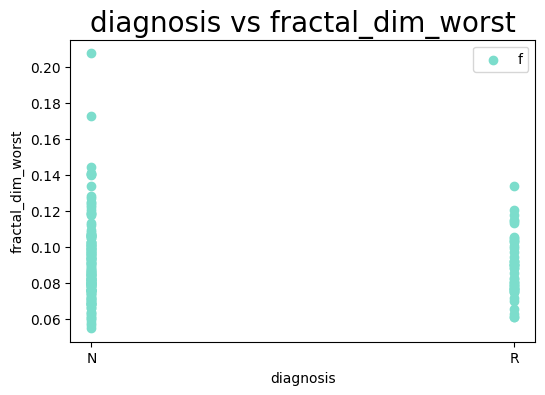

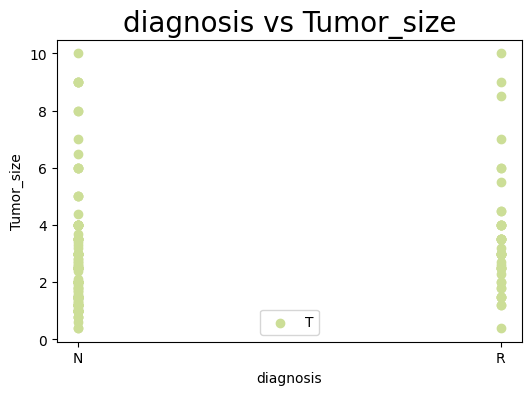

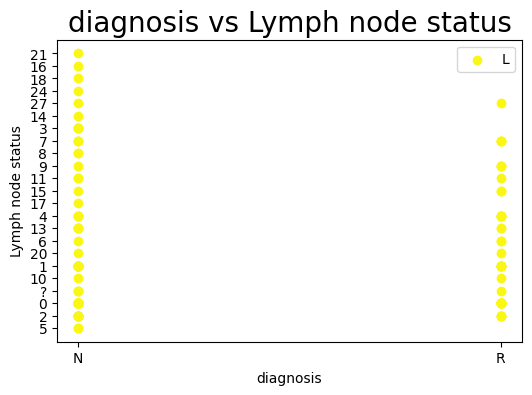

In [ ]:
x_col = 'diagnosis'
y_cols = list(df.drop('diagnosis',axis=1).columns)

for col in y_cols:
    figure = plt.figure(dpi=100)
    ax = plt.gca()
    rgb = np.random.rand(3,)
    ax.scatter(df[x_col], df[col],c=[rgb])
    ax.set_xlabel(x_col)
    ax.set_ylabel(col)
    ax.set_title("{} vs {}".format(x_col,col),fontdict={'fontsize':20})

    plt.legend(labels=col)
    plt.show()

## Multivariate Analysis
- Correlation Heatmap

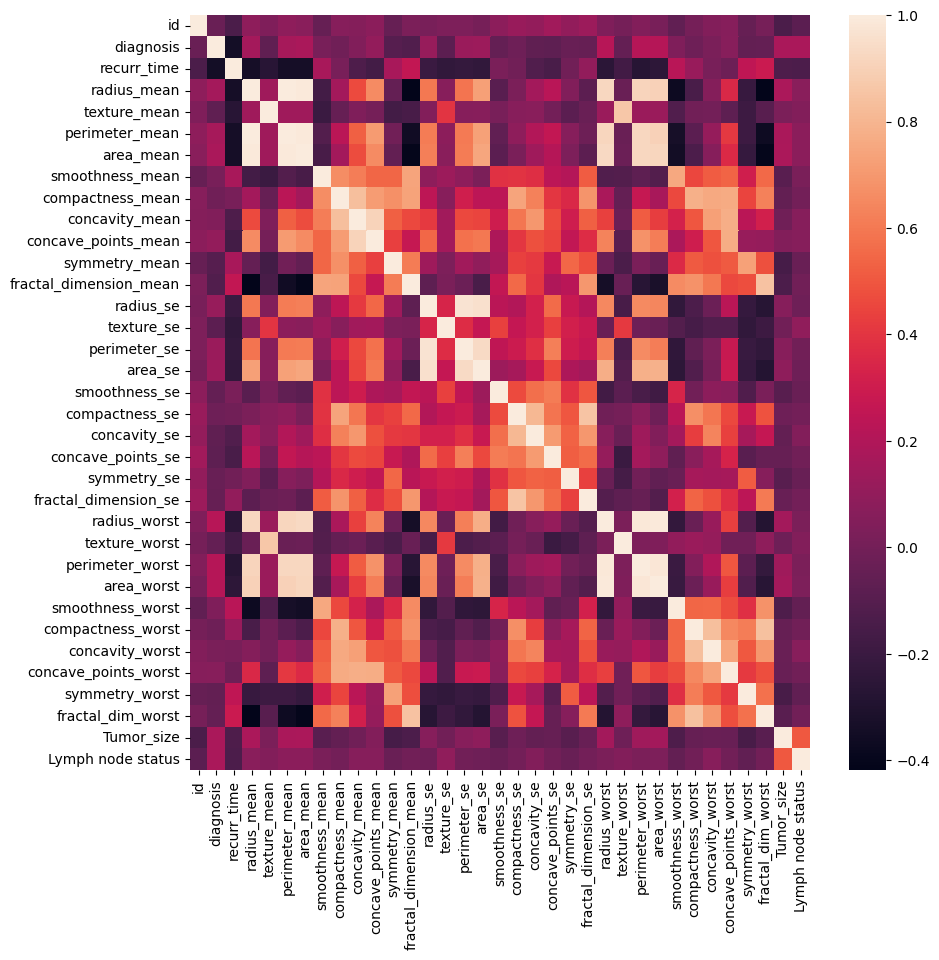

In [81]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df.corr())

## **Handling Missing Values**

In [10]:
### Mapping target column to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'N':0,'R':1})
df.head()

,id,diagnosis,recurr_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst,Tumor_size,Lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [11]:
### Dropping '?' 
df = df.replace({'?': np.nan}).dropna().astype(float)

In [12]:
### Checking missing values for all columns
df.isnull().sum()

id                        0
diagnosis                 0
recurr_time               0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave_points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
texture_worst             0
perimeter_worst           0
area_worst                0
smoothness_worst          0
compactness_worst         0
concavity_worst           0
concave_points_worst      0
symmetry_worst            0
fractal_dim_worst         0
Tumor_size                0
Lymph node status         0
dtype: int64

## **Handling Categorical Variables**

In [ ]:
### This is infact numerical feature . That's why value counts are very high
print(df['radius_mean'].value_counts())

19.55    3
15.78    3
14.19    2
19.80    2
13.17    2
        ..
23.27    1
16.78    1
18.98    1
13.43    1
16.70    1
Name: radius_mean, Length: 174, dtype: int64


In [ ]:
### Value counts of target column
df['diagnosis'].value_counts()

0    151
1     47
Name: diagnosis, dtype: int64

## **Handling Numerical Variables**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


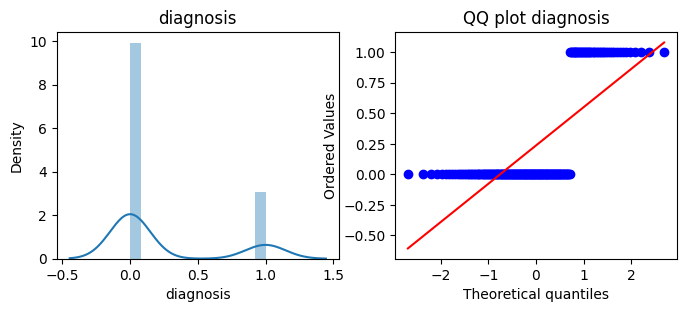

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


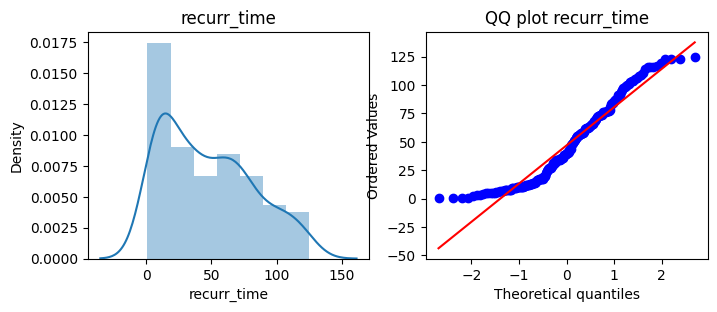

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


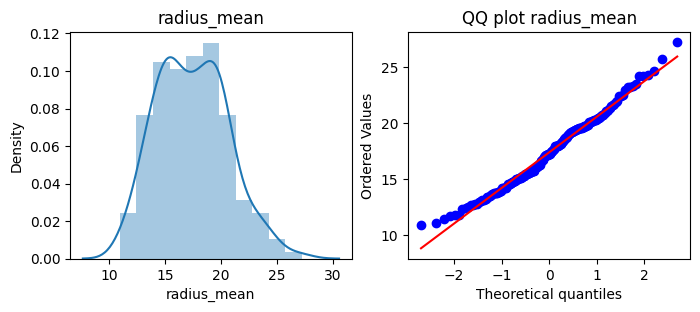

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


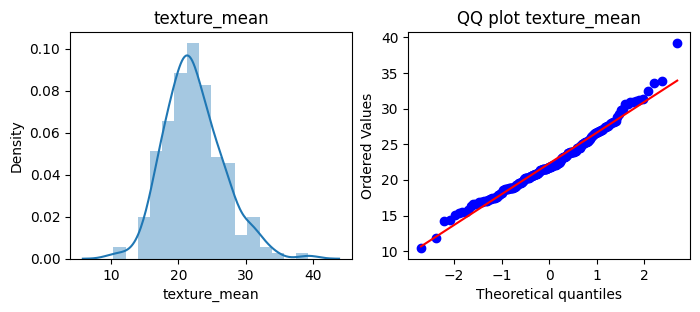

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


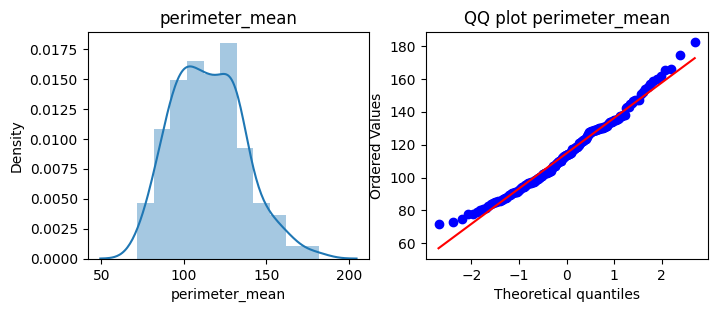

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


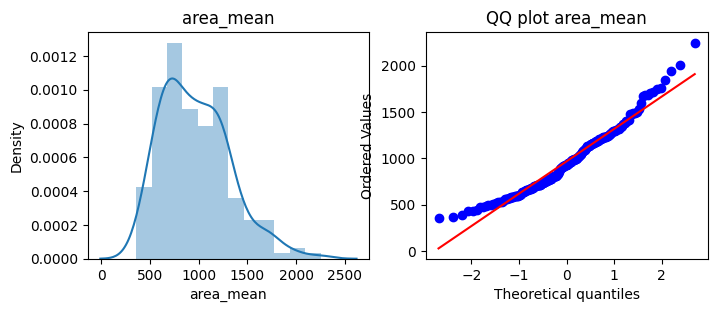

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


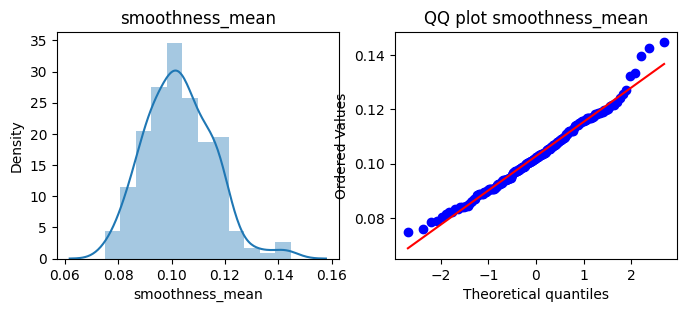

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


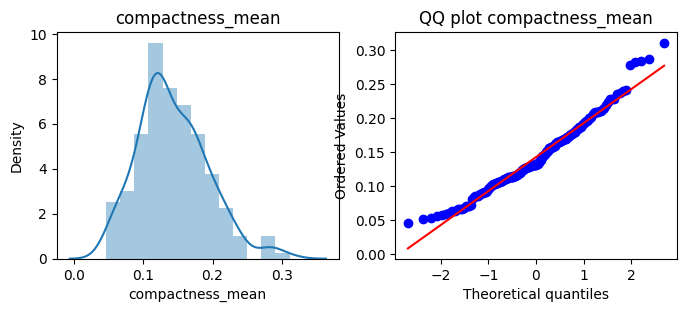

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


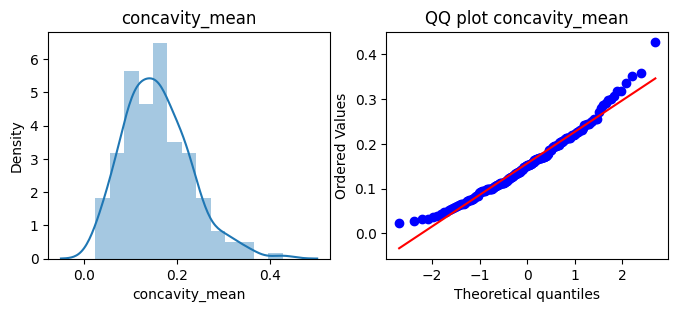

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


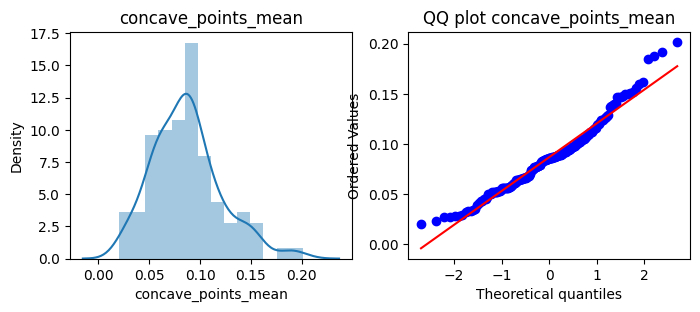

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


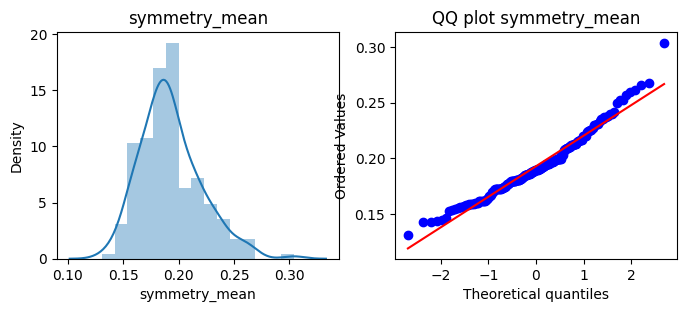

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


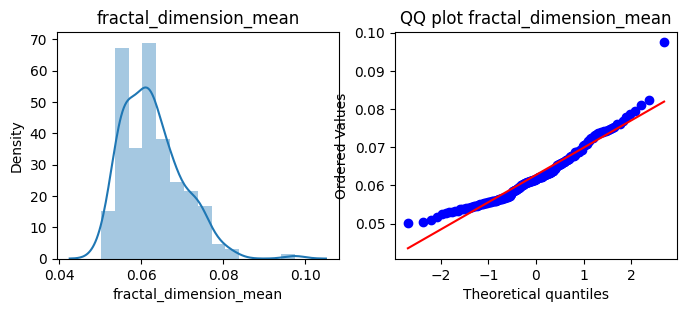

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


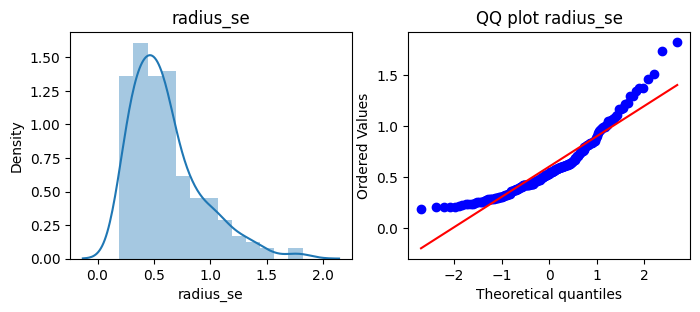

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


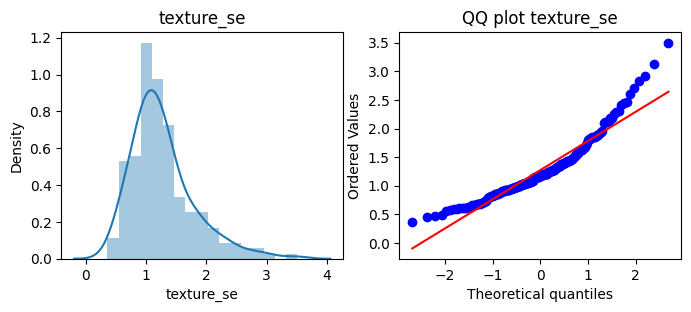

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


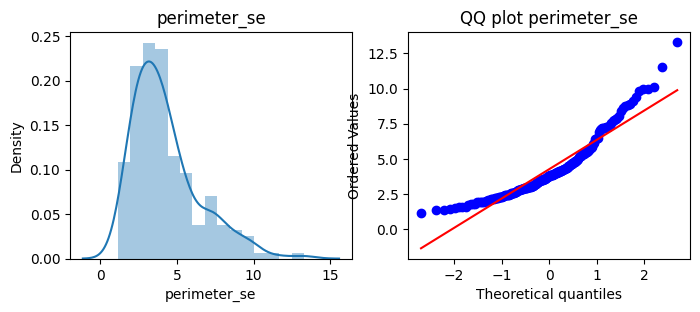

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


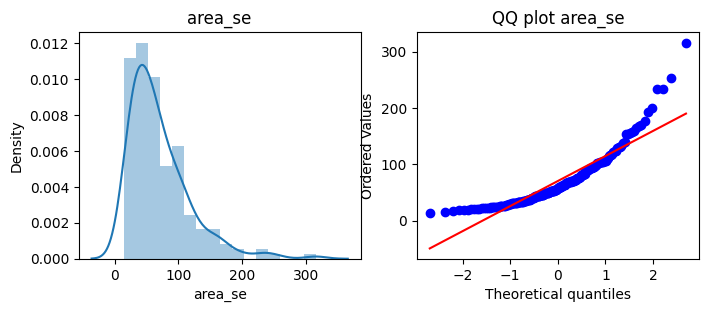

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


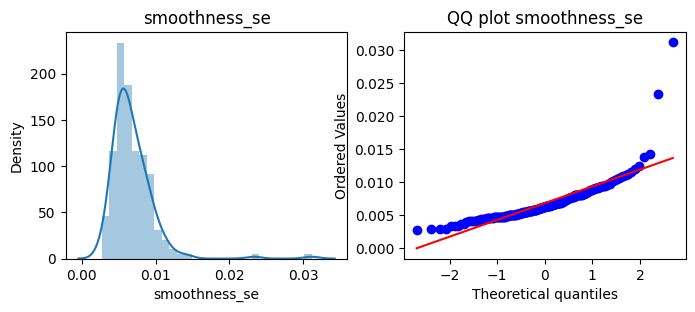

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


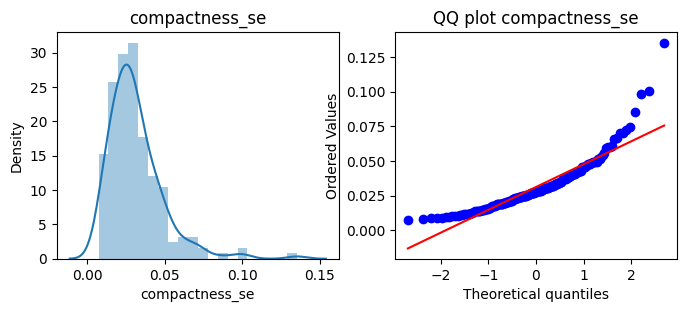

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


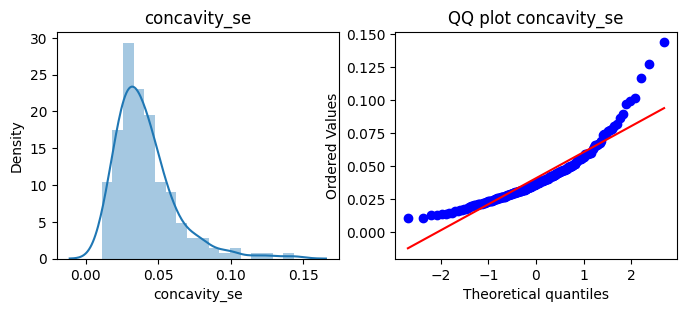

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


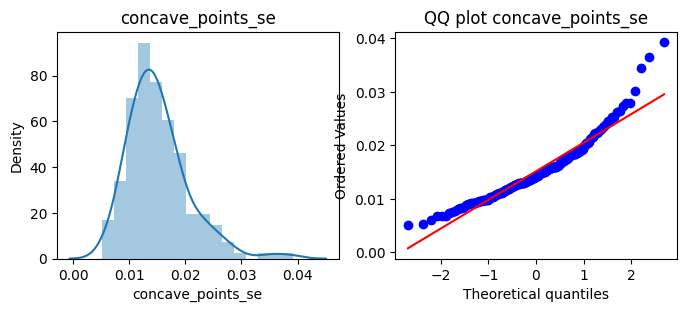

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


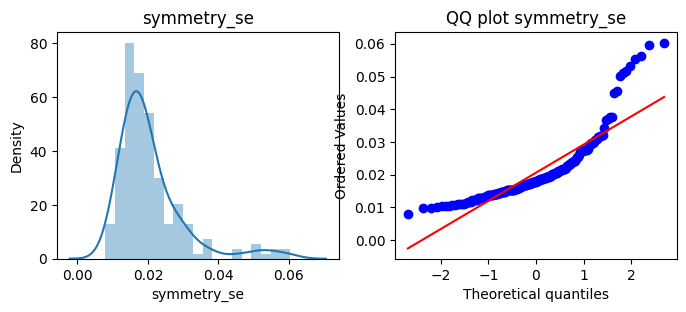

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


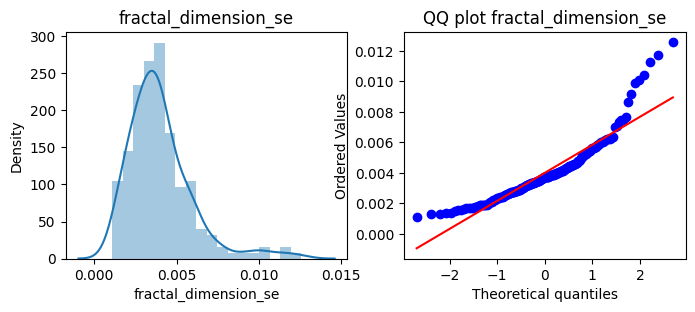

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


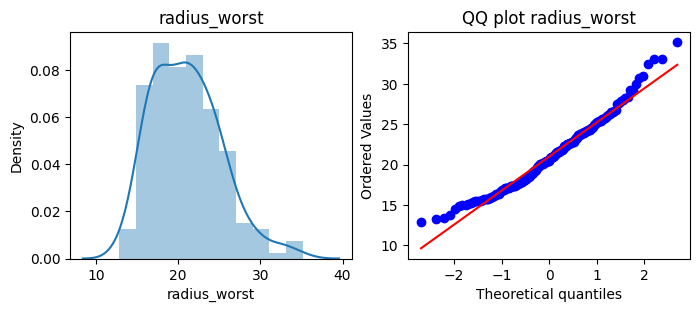

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


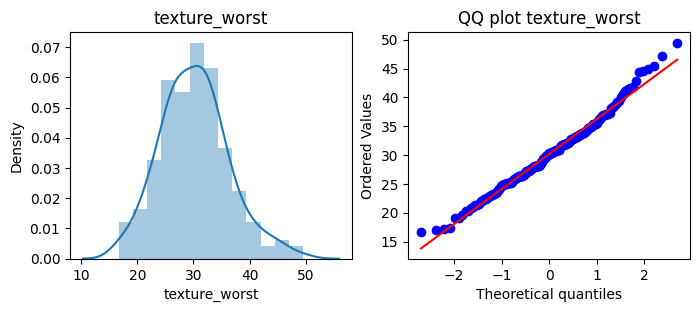

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


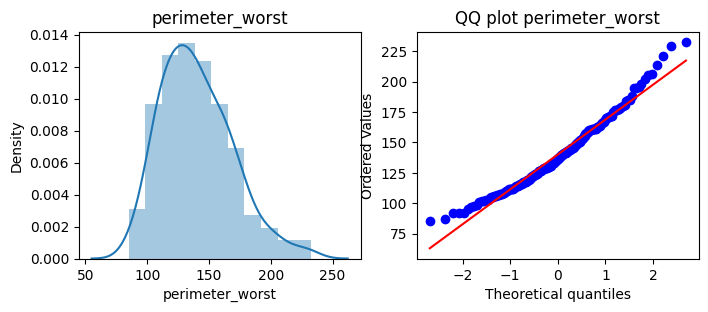

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


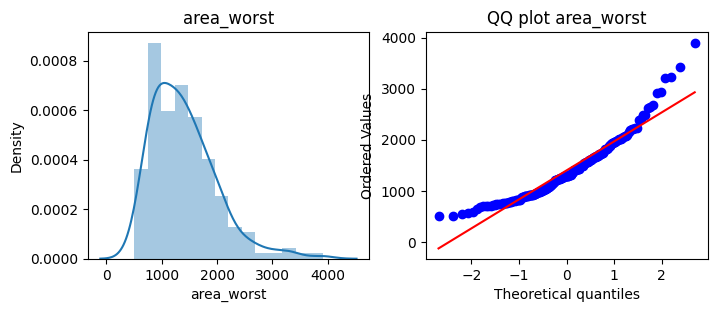

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


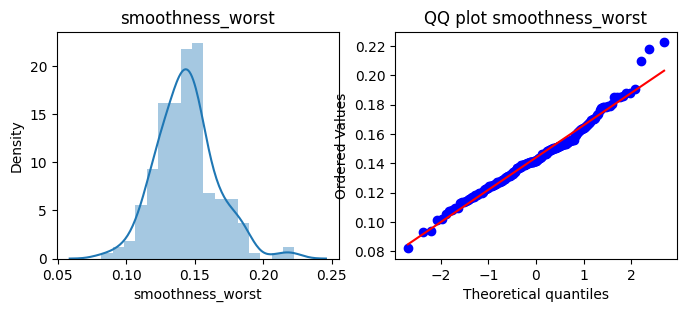

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


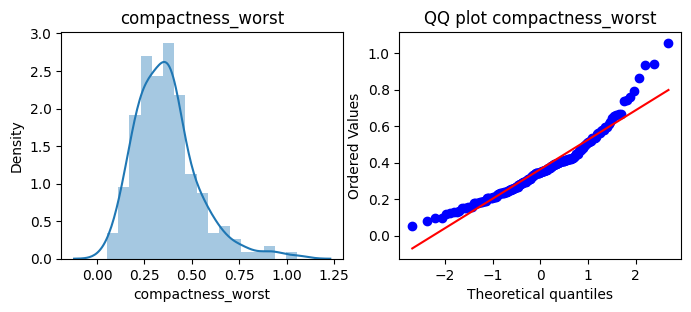

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


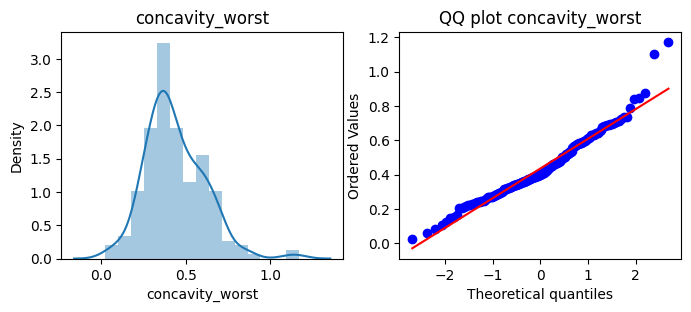

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


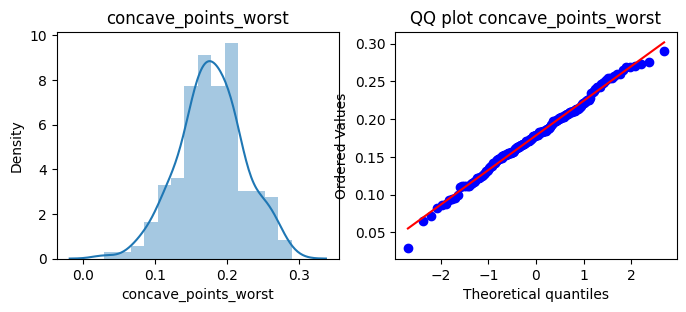

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


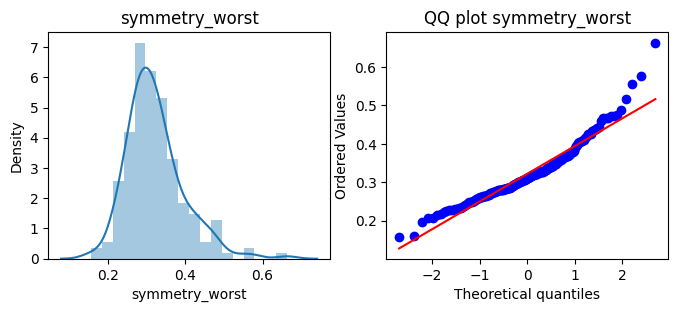

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


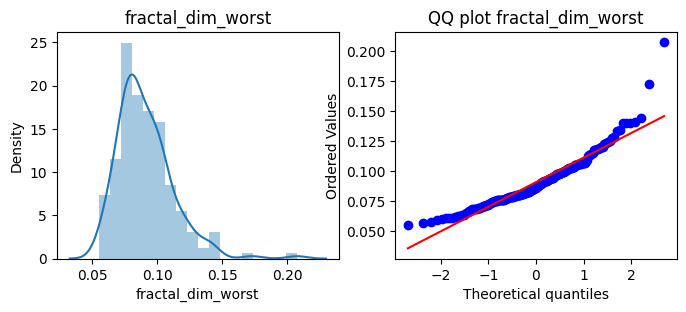

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


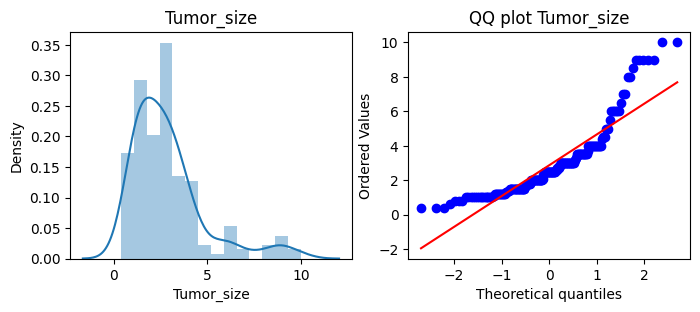

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


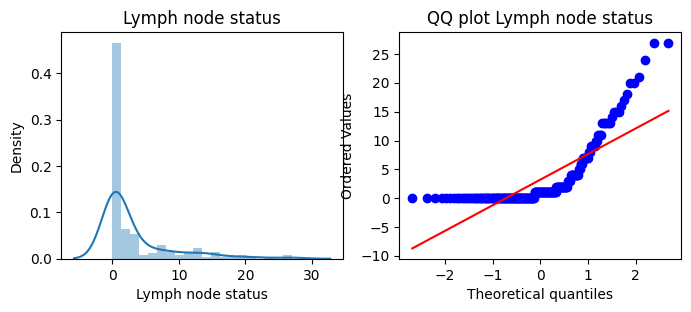

In [ ]:
### Plotting distribution graph and QQ-Plot
for i in range(len(df.columns)):
  plt.figure(figsize=(8,3),dpi=100)
  plt.subplot(121)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.subplot(122)
  stats.probplot(df[df.columns[i]], dist="norm", plot=plt)
  plt.title('QQ plot '+df.columns[i])

  plt.show()

### **Detecting Outliers and Removal using Z-score (Capping Method)**

In [13]:
### Appending upper and lower limit for all columns
upper_limit = []
lower_limit = []
for i in range(len(df.columns)):
  upper_limit.append(df[df.columns[i]].mean() + 3*df[df.columns[i]].std())
  lower_limit.append(df[df.columns[i]].mean() - 3*df[df.columns[i]].std())

In [14]:
### Replacing all limit values to their relative columns
for i in range(len(df.columns)):
  df[df.columns[i]] = np.where(
    df[df.columns[i]]>upper_limit[i],
    upper_limit[i],
    np.where(
        df[df.columns[i]]<lower_limit[i],
        lower_limit[i],
        df[df.columns[i]]
    )
)

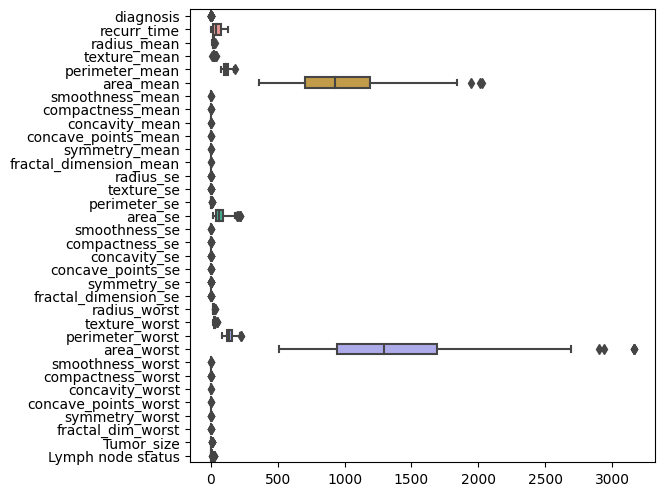

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

## **Splitting data into X and Y variables**

In [15]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

## **Over-Sampling of data**

In [16]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [18]:
X_res.shape,y_res.shape,list(y_res).count(1),list(y_res).count(0)

((254, 34), (254,), 127, 127)

## **Splitting X,Y into training and testing sets**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,stratify=y_res,random_state=101)

X_train.shape, X_test.shape

((190, 34), (64, 34))

## **Feature Scaling**

In [20]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Mean of all columns
scaler.mean_

array([1.83773076e+06, 3.75024699e+01, 1.77066063e+01, 2.19827867e+01,
       1.16842114e+02, 1.00872706e+03, 1.03203436e-01, 1.40991632e-01,
       1.61064146e-01, 8.92656561e-02, 1.92355588e-01, 6.20898033e-02,
       6.15432601e-01, 1.19933863e+00, 4.37470437e+00, 7.26293799e+01,
       6.54971808e-03, 2.99573761e-02, 3.96552693e-02, 1.45092206e-02,
       1.99199518e-02, 3.78505247e-03, 2.16288485e+01, 2.99213699e+01,
       1.44702873e+02, 1.48711997e+03, 1.45746245e-01, 3.62674751e-01,
       4.48132655e-01, 1.82549964e-01, 3.23793590e-01, 8.99913167e-02,
       3.04605003e+00, 3.22773797e+00])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,recurr_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst,Tumor_size,Lymph node status
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,41.3,17.5,22.0,115.2,979.0,0.1,0.1,0.2,0.1,0.2,...,141.6,1426.8,0.1,0.4,0.4,0.2,0.3,0.1,3.1,3.4
std,32.7,3.3,3.8,22.3,366.3,0.0,0.0,0.1,0.0,0.0,...,30.2,594.5,0.0,0.1,0.1,0.0,0.1,0.0,1.8,4.8
min,1.0,11.0,10.4,71.9,371.1,0.1,0.0,0.0,0.0,0.1,...,85.1,514.0,0.1,0.1,0.0,0.0,0.2,0.1,0.4,0.0
25%,13.0,14.6,19.8,96.6,664.7,0.1,0.1,0.1,0.1,0.2,...,117.7,936.0,0.1,0.3,0.3,0.2,0.3,0.1,1.9,0.0
50%,33.0,17.4,21.8,114.2,944.1,0.1,0.1,0.1,0.1,0.2,...,137.9,1298.0,0.1,0.4,0.4,0.2,0.3,0.1,2.7,1.0
75%,62.0,19.8,24.0,130.7,1218.2,0.1,0.2,0.2,0.1,0.2,...,160.5,1760.0,0.2,0.4,0.5,0.2,0.3,0.1,3.9,4.3
max,125.0,26.9,35.3,179.1,2028.6,0.1,0.3,0.4,0.2,0.3,...,226.6,3162.9,0.2,0.9,0.9,0.3,0.5,0.2,8.7,19.6


## **Model Building**

### 1.LogisticRegressionCV

In [21]:
log_model = LogisticRegressionCV(max_iter=5000)
log_model.fit(X_train_scaled,y_train)

LogisticRegressionCV(max_iter=5000)

In [22]:
y_pred = log_model.predict(X_test_scaled)

- Confusion Matrix Heatmap

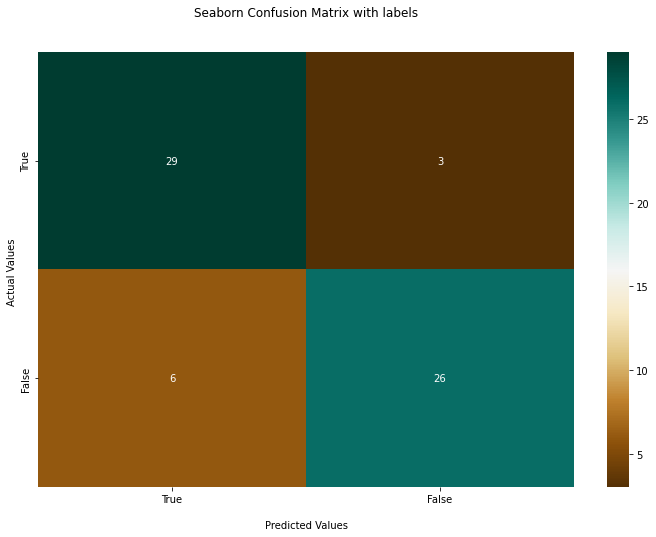

In [25]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BrBG', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

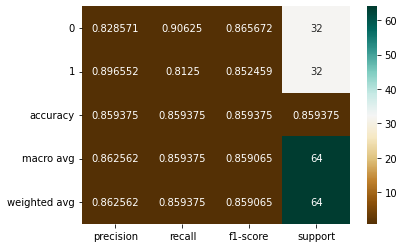

In [26]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BrBG', fmt='g')

## KNearestNeighbors

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test_scaled)

- Heatmap of Confusion Matrix

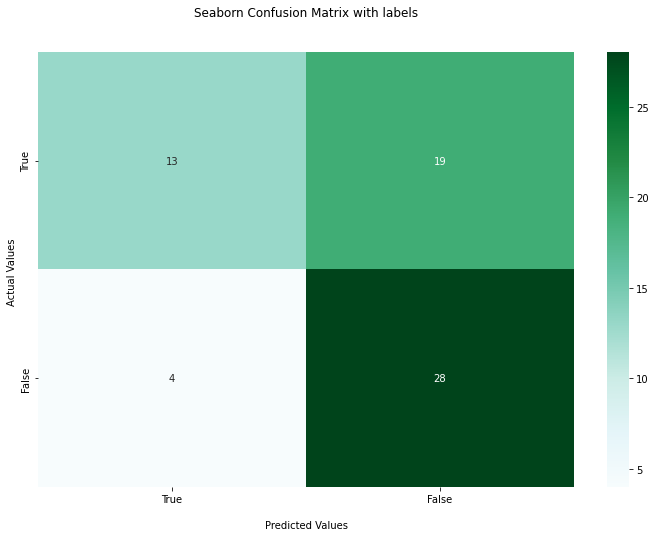

In [29]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of KNN Model

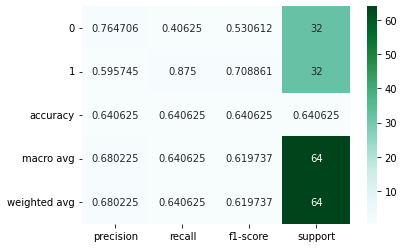

In [30]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')

## Support Vector Machines

In [31]:
# an initial SVM model with linear kernel   
svm_linear = SVC(kernel='linear')

# fit
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [32]:
y_pred = svm_linear.predict(X_test_scaled)

- Heatmap of Confusion Matrix

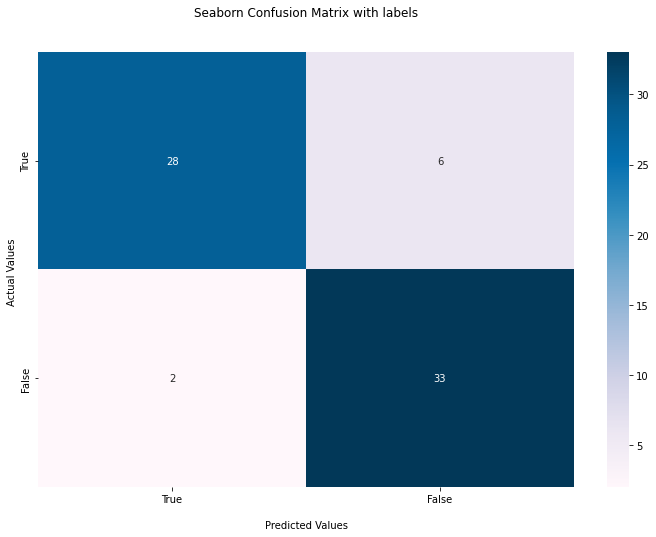

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of SVM Model

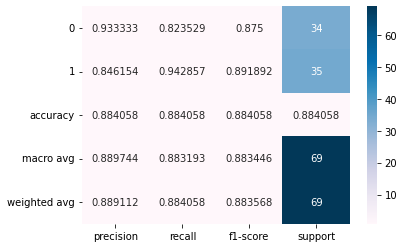

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

## Random Forest 

In [33]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [34]:
y_pred = RF.predict(X_test_scaled)

- Heatmap of Confusion Matrix

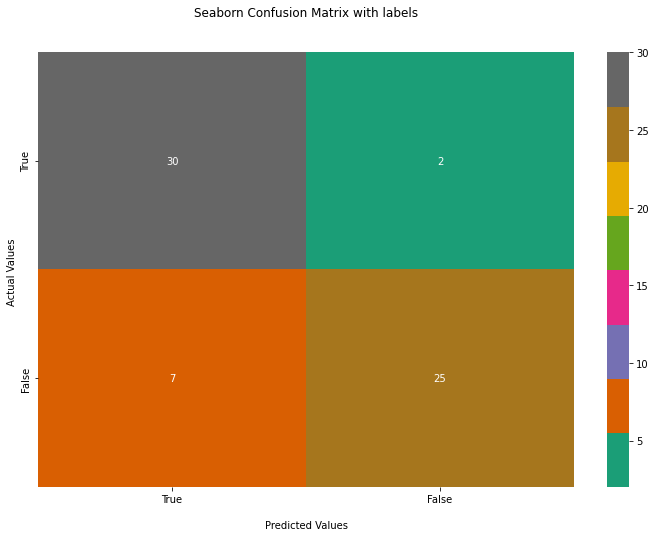

In [35]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of Random Forest

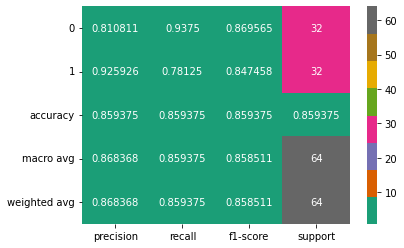

In [36]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='Dark2', fmt='g')

## AdaBoost

In [37]:
AB = AdaBoostClassifier()
AB.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [38]:
y_pred = AB.predict(X_test_scaled)

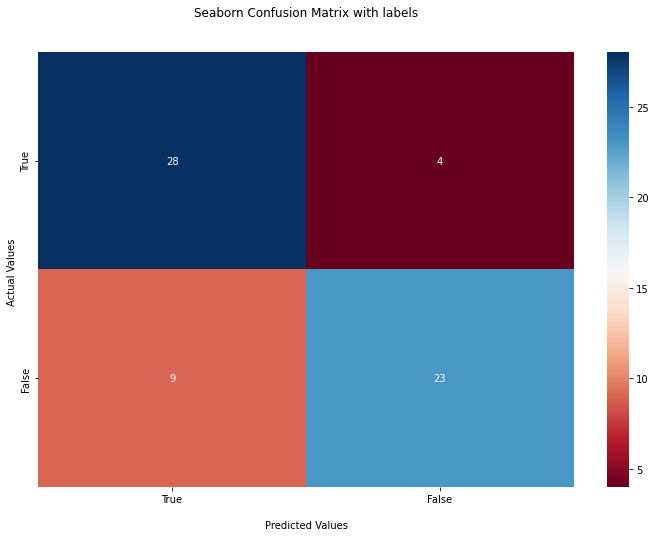

In [41]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='RdBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

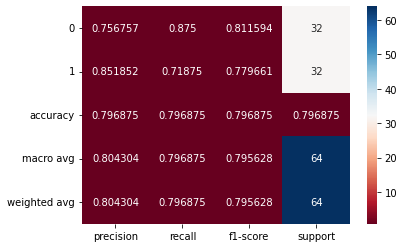

In [42]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='RdBu', fmt='g')

# GradientBoosting

In [43]:
XGB = GradientBoostingClassifier()
XGB.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [44]:
y_pred = XGB.predict(X_test_scaled)

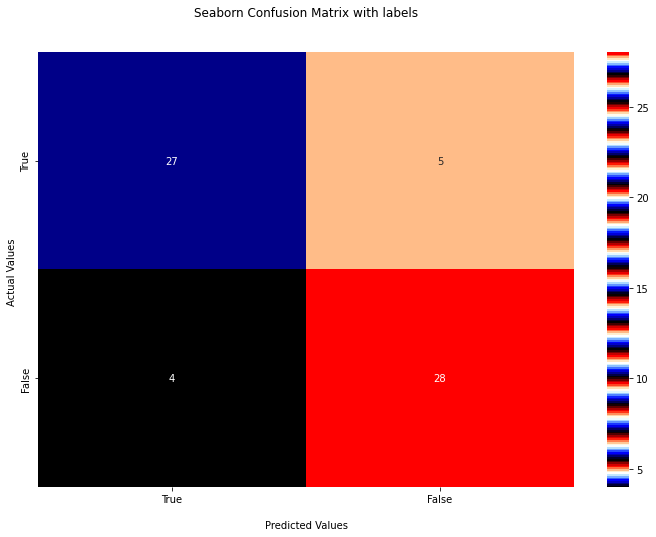

In [46]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='flag_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

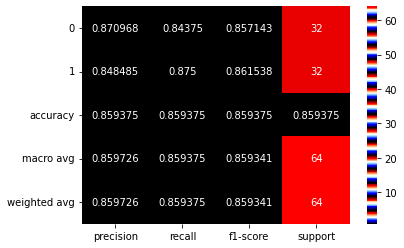

In [48]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='flag_r', fmt='g')

## LightGBM

In [49]:
LGBM = LGBMClassifier()
LGBM.fit(X_train_scaled,y_train)

LGBMClassifier()

In [50]:
y_pred = LGBM.predict(X_test_scaled)

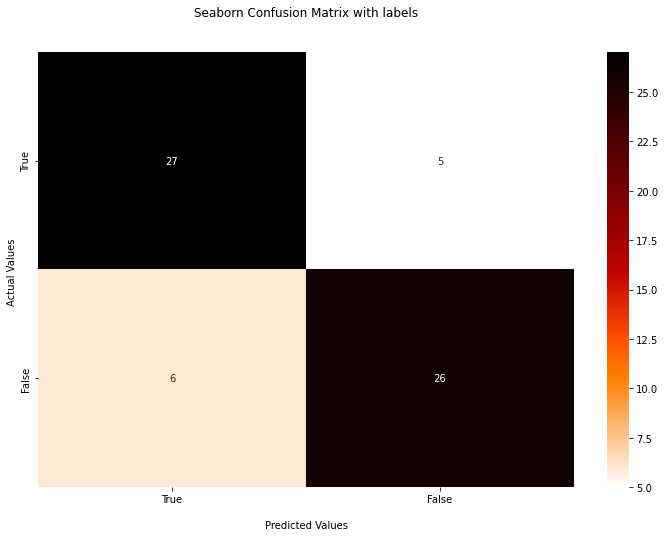

In [53]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='gist_heat_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

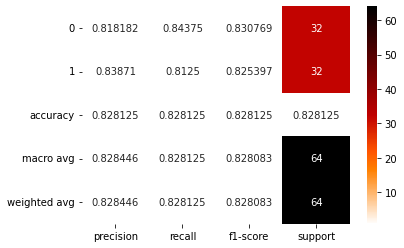

In [54]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='gist_heat_r', fmt='g')

## **Hyper-Paremeter Tuning of Models**

- Hyper-Parameter Tuning with KNN

In [55]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_scaled,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_scaled,y_train,cv=10)
    error_rate.append(1-score.mean())

[0.7368421052631579, 0.7578947368421053, 0.7105263157894737, 0.7315789473684211, 0.6789473684210525, 0.7105263157894737, 0.6736842105263158, 0.6947368421052631, 0.6684210526315789, 0.6947368421052631, 0.6473684210526316, 0.6526315789473685, 0.6578947368421053, 0.6736842105263159, 0.6578947368421052, 0.6789473684210527, 0.6578947368421052, 0.6842105263157896, 0.6631578947368422, 0.6684210526315789, 0.6421052631578948, 0.6736842105263159, 0.6473684210526316, 0.6736842105263159, 0.6684210526315788, 0.6736842105263159, 0.6631578947368422, 0.6736842105263158, 0.6368421052631579, 0.6578947368421053, 0.6210526315789474, 0.6578947368421053, 0.6368421052631581, 0.6631578947368422, 0.6368421052631579, 0.6631578947368422, 0.6368421052631579, 0.6526315789473685, 0.6526315789473685]


Text(0, 0.5, 'Error Rate')

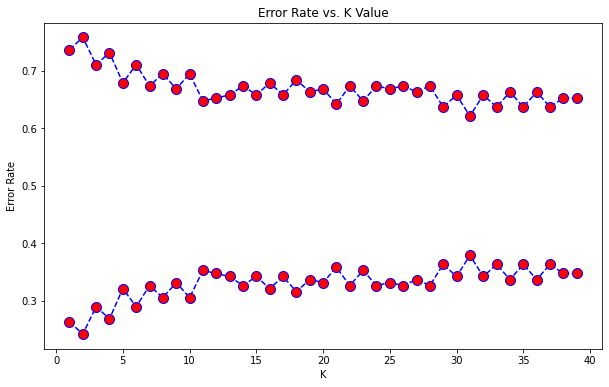

In [56]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [57]:
best_knn = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
best_knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [58]:
y_pred=best_knn.predict(X_test_scaled)

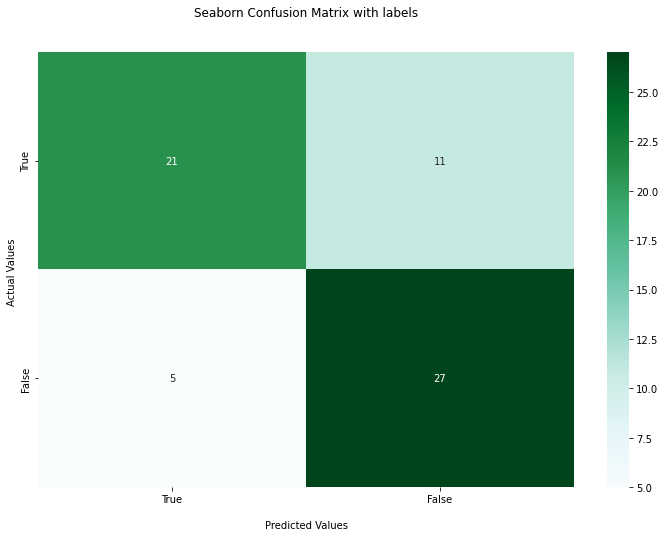

In [59]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

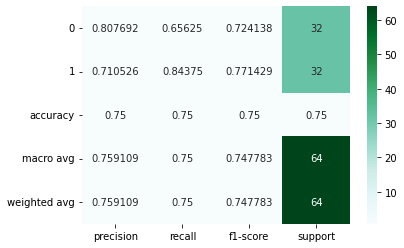

In [60]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')

Hyper-Parameter Tuning with SVM

In [61]:
parameters = {'C':np.arange(0.001,50,0.5), 
             'gamma': [1e-5,1e-4,1e-3,1e-2,1e-1,1e0],
              'kernel': ['linear','rbf']}

# instantiate a model 
svc_grid_search = SVC()

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)

# fit
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.0000e-03, 5.0100e-01, 1.0010e+00, 1.5010e+00, 2.0010e+00,
       2.5010e+00, 3.0010e+00, 3.5010e+00, 4.0010e+00, 4.5010e+00,
       5.0010e+00, 5.5010e+00, 6.0010e+00, 6.5010e+00, 7.0010e+00,
       7.5010e+00, 8.0010e+00, 8.5010e+00, 9.0010e+00, 9.5010e+00,
       1.0001e+01, 1.0501e+01, 1.1001e+01, 1.1501e+01, 1.2001e+01,
       1.2501e+01, 1....
       3.7501e+01, 3.8001e+01, 3.8501e+01, 3.9001e+01, 3.9501e+01,
       4.0001e+01, 4.0501e+01, 4.1001e+01, 4.1501e+01, 4.2001e+01,
       4.2501e+01, 4.3001e+01, 4.3501e+01, 4.4001e+01, 4.4501e+01,
       4.5001e+01, 4.5501e+01, 4.6001e+01, 4.6501e+01, 4.7001e+01,
       4.7501e+01, 4.8001e+01, 4.8501e+01, 4.9001e+01, 4.9501e+01]),
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [62]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004960,0.001902,0.001387,0.000586,0.001,0.00001,linear,"{'C': 0.001, 'gamma': 1e-05, 'kernel': 'linear'}",0.657895,0.684211,...,0.631579,0.044035,1081,0.644737,0.592105,0.605263,0.657895,0.677632,0.635526,0.032123
1,0.003568,0.000031,0.001809,0.000650,0.001,0.00001,rbf,"{'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}",0.657895,0.684211,...,0.626316,0.051028,1101,0.644737,0.605263,0.598684,0.657895,0.671053,0.635526,0.028707
2,0.003410,0.000986,0.000994,0.000027,0.001,0.0001,linear,"{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}",0.657895,0.684211,...,0.631579,0.044035,1081,0.644737,0.592105,0.605263,0.657895,0.677632,0.635526,0.032123


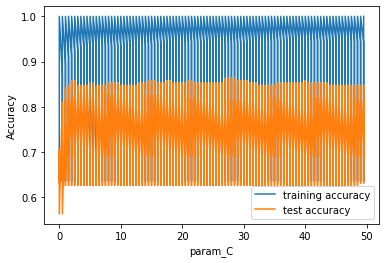

In [63]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_C"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_C"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

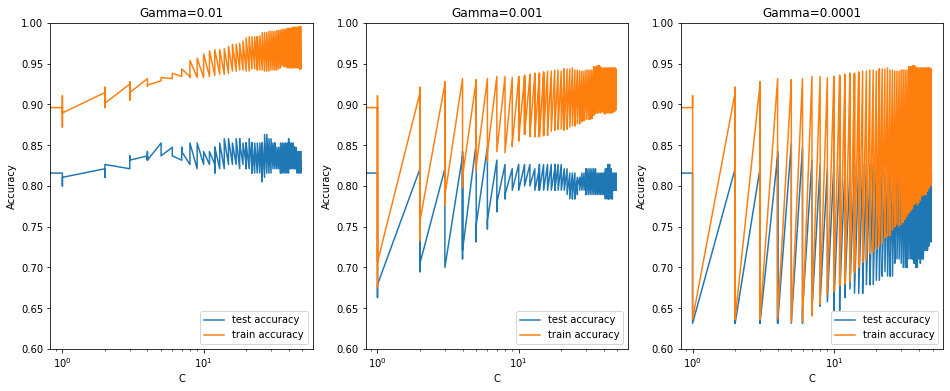

In [64]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [65]:
clf.best_params_,clf.best_score_

({'C': 27.001, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8631578947368421)

In [66]:
best_SVM = SVC(C=1.501,gamma=0.1,kernel='rbf')
best_SVM.fit(X_train_scaled,y_train)

SVC(C=1.501, gamma=0.1)

In [67]:
y_pred = best_SVM.predict(X_test_scaled)

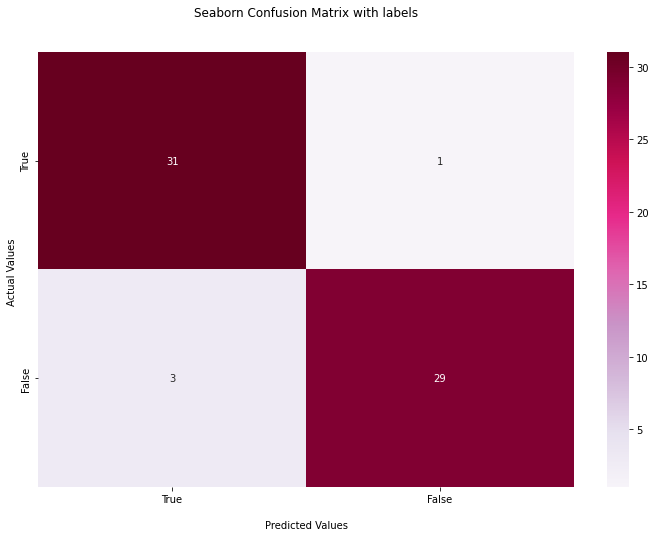

In [68]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

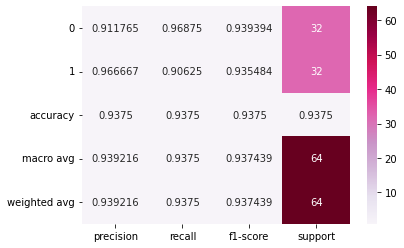

In [69]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')

- Hyper-Parameter Tuning with Random Forest

In [70]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(1,15,2),
    'min_samples_leaf': range(1,20,2),
    'min_samples_split': [1,50,2],
    'n_estimators': [5,10,20,25]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy',return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

In [71]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
840 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 2),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': [1, 50, 2],
                         'n_estimators': [5, 10, 20, 25]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [72]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8370535714285715 using {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [73]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
best_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=11,
                             min_samples_leaf=1, 
                             min_samples_split=2,
                             n_estimators=10)

In [74]:
# fit
best_rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=11, n_estimators=10)

In [75]:
y_pred = best_rfc.predict(X_test_scaled)

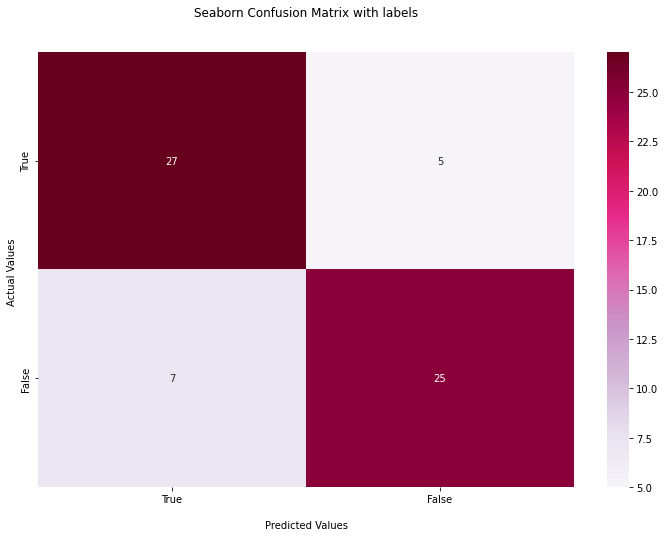

In [76]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

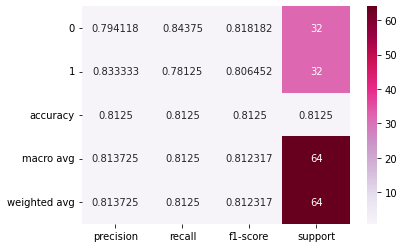

In [77]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')

In [78]:
model_ls = []
for model in [log_model,best_knn,best_SVM,best_rfc,AB,XGB,LGBM]:
    model_ls.append(model.score(X_test_scaled,y_test))
model_score = pd.DataFrame(model_ls,columns=['Accuracy'],index= ['LogisticRegressionCV','Tuned_KNN','Tuned_SVM','Tuned_RandomForest','AdaBoost','XGBoost','LightGBM'])

In [79]:
model_score

,Accuracy
LogisticRegressionCV,0.859375
Tuned_KNN,0.750000
Tuned_SVM,0.937500
Tuned_RandomForest,0.812500
AdaBoost,0.796875
XGBoost,0.859375
LightGBM,0.828125
